In [1]:
# pip install pandas plotly kaleido

# %%
import re
import pandas as pd
from plotly import express as px

In [2]:
s = """
Ψ Console Connected: Bastard Keyboards Charybdis (4x6) Splinky (A8F8:1833:1)
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 0.000 max.vsc: 0.001 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 1.612 max.vsc: 9.267 max.a: 3.791054
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 1.281 max.vsc: 7.360 max.a: 2.469344
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 9.130 max.vsc: 52.472 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 11.511 max.vsc: 66.154 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 12.977 max.vsc: 74.580 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 12.175 max.vsc: 69.973 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 1.414 max.vsc: 8.128 max.a: 3.067777
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 1.970 max.vsc: 11.321 max.a: 4.677792
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 12.731 max.vsc: 73.167 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 0.632 max.vsc: 3.635 max.a: 1.005487
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 0.283 max.vsc: 1.626 max.a: 1.000099
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 max.vin: 1.131 max.vsc: 6.502 max.a: 1.758612
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 max.vin: 1.442 max.vsc: 4.144 max.a: 1.015071
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 max.vin: 22.672 max.vsc: 65.148 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 max.vin: 29.417 max.vsc: 84.532 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 max.vin: 30.487 max.vsc: 87.606 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 max.vin: 34.536 max.vsc: 99.241 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 max.vin: 24.926 max.vsc: 71.627 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 max.vin: 36.063 max.vsc: 103.629 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 max.vin: 36.063 max.vsc: 69.086 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 max.vin: 36.063 max.vsc: 69.086 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 max.vin: 36.587 max.vsc: 70.090 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 max.vin: 44.901 max.vsc: 64.513 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 max.vin: 36.063 max.vsc: 51.814 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 max.vin: 1.414 max.vsc: 2.032 max.a: 1.000224
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 max.vin: 0.151 max.vsc: 0.173 max.a: 1.000005
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 max.vin: 36.063 max.vsc: 41.451 max.a: 5.999292
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 max.vin: 5.532 max.vsc: 6.358 max.a: 1.650120
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 max.vin: 18.830 max.vsc: 21.643 max.a: 5.899883
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 max.vin: 36.063 max.vsc: 41.451 max.a: 5.999292
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1400 max.vin: 45.078 max.vsc: 43.179 max.a: 5.999540
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1400 max.vin: 45.078 max.vsc: 37.010 max.a: 5.997852
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1400 max.vin: 45.078 max.vsc: 37.010 max.a: 5.997852
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 0.374 max.vsc: 0.268 max.a: 1.000007
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 36.063 max.vsc: 25.907 max.a: 5.965519
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1800 max.vin: 0.178 max.vsc: 0.114 max.a: 1.000005
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1800 max.vin: 45.078 max.vsc: 28.786 max.a: 5.983210
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 max.vin: 0.379 max.vsc: 0.218 max.a: 1.000006
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 max.vin: 36.063 max.vsc: 20.726 max.a: 5.874065
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 max.vin: 0.174 max.vsc: 0.100 max.a: 1.000005
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 max.vin: 45.078 max.vsc: 25.907 max.a: 5.965519
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 max.vin: 2.608 max.vsc: 1.499 max.a: 1.000077
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2200 max.vin: 36.063 max.vsc: 20.726 max.a: 5.874065
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 max.vin: 36.063 max.vsc: 18.842 max.a: 5.798295
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 max.vin: 36.063 max.vsc: 17.271 max.a: 5.701330
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 max.vin: 45.078 max.vsc: 21.589 max.a: 5.898519
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 max.vin: 45.078 max.vsc: 21.589 max.a: 5.898519
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 max.vin: 7.088 max.vsc: 3.395 max.a: 1.003400
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 max.vin: 0.200 max.vsc: 0.096 max.a: 1.000005
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 max.vin: 36.063 max.vsc: 17.271 max.a: 5.701330
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2600 max.vin: 0.002 max.vsc: 0.001 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2600 max.vin: 4.472 max.vsc: 1.977 max.a: 1.000200
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2600 max.vin: 36.063 max.vsc: 15.943 max.a: 5.583669
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2600 max.vin: 28.712 max.vsc: 12.693 max.a: 5.061830
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2600 max.vin: 4.243 max.vsc: 1.876 max.a: 1.000163
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2600 max.vin: 11.402 max.vsc: 5.041 max.a: 1.084866
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 max.vin: 45.078 max.vsc: 19.929 max.a: 5.846292
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 max.vin: 0.022 max.vsc: 0.009 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 max.vin: 0.894 max.vsc: 0.367 max.a: 1.000008
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 max.vin: 45.078 max.vsc: 18.505 max.a: 5.780595
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 max.vin: 45.078 max.vsc: 18.505 max.a: 5.780595
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 max.vin: 0.018 max.vsc: 0.007 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 max.vin: 3.329 max.vsc: 1.275 max.a: 1.000050
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 max.vin: 45.078 max.vsc: 17.271 max.a: 5.701330
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 max.vin: 36.063 max.vsc: 13.817 max.a: 5.291670
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 max.vin: 0.200 max.vsc: 0.072 max.a: 1.000004
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 max.vin: 6.161 max.vsc: 2.213 max.a: 1.000321
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 max.vin: 45.078 max.vsc: 16.192 max.a: 5.608806
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 max.vin: 33.866 max.vsc: 12.165 max.a: 4.929323
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 0.001 max.vsc: 0.007 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 max.vin: 25.144 max.vsc: 144.503 max.a: 6.000000
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 max.vin: 0.002 max.vsc: 0.005 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 max.vin: 0.894 max.vsc: 2.570 max.a: 1.000656
"""

In [3]:
regex = r"MACCEL: DPI: +(\d+) +max.vin: +(\d+\.\d+) +max.vsc: +(\d+\.\d+) +max.a: +(\d+\.\d+)"
df = pd.DataFrame(
    [
        [f(d) for f, d in zip([int, float, float, float], m.groups())]
        for m in re.finditer(regex, s)
    ],
    columns="DPI V_input V_scaled Accel_factor".split(),
)
df = df.groupby("DPI").max()
df

,V_input,V_scaled,Accel_factor
DPI,,,
200,25.144,144.503,6.000000
400,34.536,99.241,6.000000
600,36.063,103.629,6.000000
800,44.901,70.090,6.000000
1000,36.063,41.451,5.999292
1200,36.063,41.451,5.999292
1400,45.078,43.179,5.999540
1600,36.063,25.907,5.965519
1800,45.078,28.786,5.983210


In [4]:
fig = px.line(df)
fig

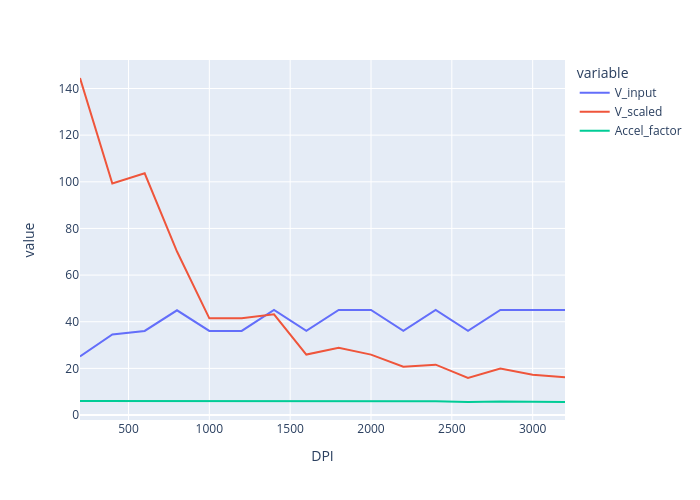

In [5]:
# Generate static diagrag for GitHub: https://plotly.com/python/static-image-export/
fig.show("png")

In [6]:
# compiled 1600 DPI
s = '''
Ψ Conqsole Connected: Bastard Keyboards Charybdis (4x6) Splinky (A8F8:1833:1)
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 2.600 max.vsc: 1.868 max.a: 1.000161
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 1.649 max.vsc: 1.185 max.a: 1.000041
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 3.200 max.vsc: 2.299 max.a: 1.000381
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 6.174 max.vsc: 4.435 max.a: 1.026695
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 8.395 max.vsc: 6.031 max.a: 1.433022
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 7.518 max.vsc: 5.401 max.a: 1.162111
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 2.600 max.vsc: 1.868 max.a: 1.000161
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 0.200 max.vsc: 0.144 max.a: 1.000005
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 26.965 max.vsc: 19.372 max.a: 5.823325
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 36.063 max.vsc: 25.907 max.a: 5.965519
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 36.063 max.vsc: 25.907 max.a: 5.965519
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 36.063 max.vsc: 25.907 max.a: 5.965519
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 36.063 max.vsc: 25.907 max.a: 5.965519
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 36.063 max.vsc: 25.907 max.a: 5.965519
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 max.vin: 32.016 max.vsc: 23.000 max.a: 5.928674
'''